In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import random
import time
import argparse
from bs4 import BeautifulSoup

In [42]:
boardgames = pd.read_csv('../data/boardgames.csv')

In [43]:
#boardgames.set_index('id', inplace=True)
boardgames

,rank,name,id,links,num_voters
0,104.0,Pandemic,30549,/boardgame/30549/pandemic,104891
1,184.0,Carcassonne,822,/boardgame/822/carcassonne,104530
2,408.0,Catan,13,/boardgame/13/catan,103960
3,71.0,7 Wonders,68448,/boardgame/68448/7-wonders,86475
4,101.0,Dominion,36218,/boardgame/36218/dominion,79469
...,...,...,...,...,...
44995,NaN,Silent But Deadly,138578,/boardgame/138578/silent-deadly,10
44996,NaN,Hull Breach: In Defiance of Dictators,138730,/boardgame/138730/hull-breach-defiance-dictators,10
44997,NaN,Wahrheit oder Blödsinn?,139581,/boardgame/139581/wahrheit-oder-blodsinn,10
44998,NaN,Zombie Shuffle,139637,/boardgame/139637/zombie-shuffle,10


In [44]:
boardgames['num_voters'].min()

10

In [45]:
boardgames['num_voters'].mean()

456.43926666666664

In [46]:
boardgames['num_voters'].median()

49.0

In [47]:
boardgames['num_voters'].sum()

20539767

<AxesSubplot:>

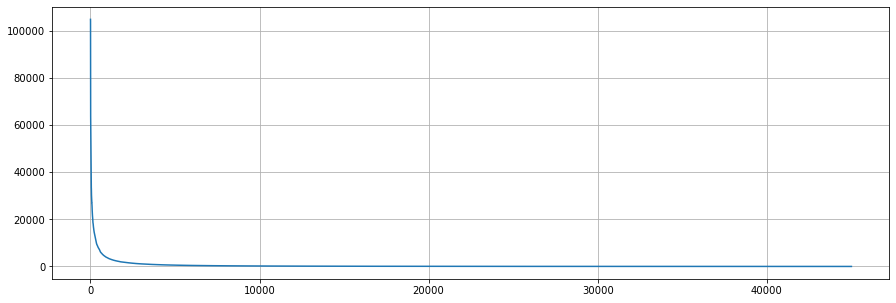

In [49]:
boardgames['num_voters'].plot(figsize=(15,5), grid=True)

<AxesSubplot:>

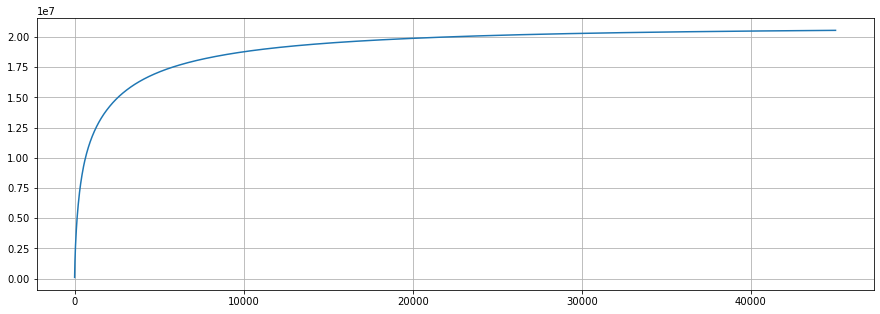

In [50]:
boardgames['num_voters'].cumsum().plot(figsize=(15,5), grid=True)

In [58]:
boardgames = boardgames.set_index('id')

In [101]:
b_id = 125618
print(boardgames.loc[:b_id]['num_voters'].sum())
print(boardgames.loc[:b_id]['num_voters'].count())

6982749
278


In [3]:
ratings = pd.read_csv('../data/ratings_cleaned.csv')

In [14]:
ratings.shape

(20484318, 3)

In [12]:
ratings.head()

,boardgame_id,ratings,user_id
0,30549,10.0,214
1,822,10.0,214
2,13,10.0,214
3,68448,10.0,214
4,36218,10.0,214


In [13]:
ratings.tail()

,boardgame_id,ratings,user_id
20484313,157894,10.0,263045
20484314,174474,10.0,263045
20484315,151978,10.0,263045
20484316,224164,10.0,263045
20484317,271265,10.0,263045


In [17]:
ratings[ratings['boardgame_id']==306882].sort_values('ratings', ascending=False)

,boardgame_id,ratings,user_id
36698,306882,10.0,15978
1405700,306882,10.0,3377
1871061,306882,10.0,7216
15069519,306882,10.0,88039
15083730,306882,10.0,92668
...,...,...,...
13607238,306882,5.0,205
6997094,306882,5.0,5278
3740199,306882,4.0,1351
16827916,306882,1.0,123871


In [5]:
users = pd.read_csv('../data/users.csv')
users.head()

,user_name,num_ratings,user_id
0,Walt Mulder,8675,0
1,Doel,8599,1
2,TomVasel,7052,2
3,warta,6902,3
4,jmdsplotter,6210,4


In [7]:
users.tail()

,user_name,num_ratings,user_id
398894,NickFury,1,398894
398895,ploci,1,398895
398896,plntgntprncsfbldryl,1,398896
398897,gregoryvit,1,398897
398898,Yoshipl,1,398898


In [9]:
users.shape

(398899, 3)

<AxesSubplot:>

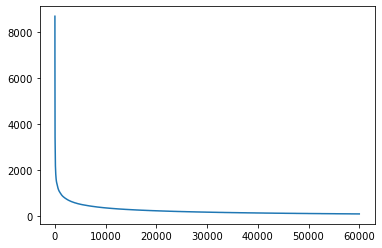

In [11]:
users.loc[:60000,'num_ratings'].plot()

In [95]:
users = pd.DataFrame(ratings.value_counts('user_name'), columns=['num_ratings'])

In [96]:
users['user_id'] = range(0,len(users))
users

,num_ratings,user_id
user_name,,
Doel,208,0
squaredeh,187,1
RonCarlson01,178,2
arsior,164,3
tugurio77,162,4
...,...,...
kziel,1,306748
Zerase,1,306749
kzkedzierska,1,306750


In [116]:
boardgames_ext = pd.read_csv('../data/boardgames_extend_backup.csv')
boardgames_ext.head()

,id,rank,name,links,num_voters,categories,mechanics,family,expansions,integrations,designers,publishers
0,30549,104.0,Pandemic,/boardgame/30549/pandemic,104891,Medical,"Action Points, Cooperative Game, Hand Manageme...","Components: Map (Global Scale), Components: Mu...",Pandemic: Gen Con 2016 Promos – Z-Force Team M...,NaN,Matt Leacock,"Z-Man Games, Inc., (Unknown), Albi, Asmodee, A..."
1,822,184.0,Carcassonne,/boardgame/822/carcassonne,104530,"City Building, Medieval, Territory Building","Area Majority / Influence, Map Addition, Tile ...","Cities: Carcassonne (France), Components: Meep...","20 Jahre Darmstadt Spielt, Apothecaries (fan e...",Carcassonne: Wheel of Fortune,Klaus-Jürgen Wrede,"Hans im Glück, 999 Games, Albi, Bard Centrum G..."
2,13,408.0,Catan,/boardgame/13/catan,103960,"Economic, Negotiation","Dice Rolling, Hexagon Grid, Income, Modular Bo...","Animals: Sheep, Components: Hexagonal Tiles, C...","20 Jahre Darmstadt Spielt, Brettspiel Adventsk...",NaN,Klaus Teuber,"KOSMOS, 999 Games, Albi, Astrel Games, Bergsal..."
3,68448,71.0,7 Wonders,/boardgame/68448/7-wonders,86475,"Ancient, Card Game, City Building, Civilizatio...","Drafting, Hand Management, Set Collection, Sim...","Digital Implementations: Board Game Arena, Gam...","7 Wonders: Armada, 7 Wonders: Babel, 7 Wonders...",NaN,Antoine Bauza,"Repos Production, ADC Blackfire Entertainment,..."
4,36218,101.0,Dominion,/boardgame/36218/dominion,79469,"Card Game, Medieval","Deck, Bag, and Pool Building, Delayed Purchase...","Crowdfunding: Wspieram, Game: Dominion, Misc: ...","Ancient Times (fan expansion for Dominion), An...",Dominion: Intrigue,Donald X. Vaccarino,"Rio Grande Games, 999 Games, Albi, Bard Centru..."


In [117]:
boardgames_ext.shape

(45000, 12)

In [118]:
boardgames_ext[boardgames_ext['categories'].isna()]

,id,rank,name,links,num_voters,categories,mechanics,family,expansions,integrations,designers,publishers
349,160851,767.0,Lanterns: The Harvest Festival,/boardgame/160851/lanterns-harvest-festival,9852,NaN,"Hand Management, Pattern Building, Set Collect...","Country: China, Crowdfunding: Kickstarter, Gam...","Lanterns: The Emperor's Gifts, Lanterns: The H...",NaN,Christopher Chung,"Foxtrot Games, Renegade Game Studios, Broadway..."
633,34585,1749.0,Keltis,/boardgame/34585/keltis,5758,NaN,"Hand Management, Point to Point Movement, Set ...","Game: Lost Cities, Series: Native-art line (Ko...","Keltis: Neue Wege, Neue Ziele",NaN,Reiner Knizia,"KOSMOS, 999 Games, Competo / Marektoy, Devir, ..."
871,106217,758.0,Hawaii,/boardgame/106217/hawaii,4235,NaN,"Action Points, Area Movement, Modular Board, W...","Digital Implementations: Board Game Arena, Dig...",Hawaii: Kamapua'as Gunst,NaN,Greg Daigle,"Hans im Glück, 999 Games, Filosofia Éditions, ..."
1538,165986,1096.0,Royals,/boardgame/165986/royals,2346,NaN,"Area Majority / Influence, Card Drafting, Set ...",Series: Dice Tower Essentials,NaN,NaN,Peter Hawes,"ABACUSSPIELE, Arcane Wonders, Broadway Toys LTD"
1610,37371,1927.0,Piece o' Cake,/boardgame/37371/piece-o-cake,2233,NaN,"Area Majority / Influence, I Cut, You Choose, ...",Theme: Food / Cooking,...aber Bitte mit Sahne: Das Joker-Stück,NaN,Jeffrey D. Allers,"Winning Moves Germany, New Games Order, LLC, O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,138578,NaN,Silent But Deadly,/boardgame/138578/silent-deadly,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44996,138730,NaN,Hull Breach: In Defiance of Dictators,/boardgame/138730/hull-breach-defiance-dictators,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44997,139581,NaN,Wahrheit oder Blödsinn?,/boardgame/139581/wahrheit-oder-blodsinn,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44998,139637,NaN,Zombie Shuffle,/boardgame/139637/zombie-shuffle,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
boardgames_ext[boardgames_ext['id']==6338]

,id,rank,name,links,num_voters,categories,mechanics,family,expansions,integrations,designers,publishers
23899,6338,11744.0,Seekrieg (Fourth Edition),/boardgame/6338/seekrieg-fourth-edition,43,"Nautical, Post-Napoleonic, Wargame, World War ...","Dice Rolling, Simulation","Misc: Free Wargames, Players: Two Player Only ...",Seekrieg (Fourth Edition): CNO Series – Naval ...,NaN,"Jack L. Joyner, R. A. Nadeau, Richard Sartore","Richard R. Sartore & Associates, Xeno Games"


In [96]:
boardgames = pd.read_csv('../data/boardgames.csv', index_col='id')

In [115]:
boardgames.loc[6338:]

,rank,name,links,num_voters
id,,,,
6338,11744.0,Seekrieg (Fourth Edition),/boardgame/6338/seekrieg-fourth-edition,43
6367,16163.0,Make 7,/boardgame/6367/make-7,43
6417,11722.0,Dredd: The Card Game,/boardgame/6417/dredd-card-game,43
6706,15849.0,Xerxes,/boardgame/6706/xerxes,43
6983,14720.0,Jungle,/boardgame/6983/jungle,43
...,...,...,...,...
138578,NaN,Silent But Deadly,/boardgame/138578/silent-deadly,10
138730,NaN,Hull Breach: In Defiance of Dictators,/boardgame/138730/hull-breach-defiance-dictators,10
139581,NaN,Wahrheit oder Blödsinn?,/boardgame/139581/wahrheit-oder-blodsinn,10


In [98]:
boardgames_ext[boardgames_ext['name']=='Everdell']

,id,rank,name,links,num_voters,categories,mechanics,family,expansions,integrations,designers,publishers
102,199792,28.0,Everdell,/boardgame/199792/everdell,23457,"Animals, Card Game, City Building, Fantasy","Card Drafting, End Game Bonuses, Hand Manageme...","Components: 3-Dimensional (3D), Crowdfunding: ...","Everdell: Bellfaire, Everdell: Extra! Extra!, ...",NaN,James A. Wilson,"Starling Games (II), Abraxas, Arclight, CMON G..."
